# Value iteration

The objective in a MDP is to find a policy $\pi^*$ such that

$$\pi^*(a|s) = \underset{\pi}{\text{argmax}}\; V_{\pi}(s)$$

Where $V_{\pi}(s)$ is defined as

$$ V_{\pi}(s) = \mathbb{E}_{a_0, s_1, a_1,...|s_0=s}[\sum_{i=0}^\infty \gamma^i r_{i}|s_0=s]$$

Note that we can simplify $V_{\pi}(s)$ to 

$$ 
\begin{align*}
V_{\pi}(s) &= \mathbb{E}_{a_0, s_1, a_1,...|s_0=s}[\sum_{i=0}^\infty \gamma^i r_{i}|s_0=s]\\
&= \mathbb{E}_{a_0, s_1, a_1,...|s_0=s}[r_0 + \gamma\sum_{i=0}^\infty \gamma^i r_{i}|s_0=s]\\
&= \mathbb{E}_{a_0|s_0=s}\bigg[\mathbb{E}_{s_1|a_0, s_0=s}\bigg[\mathbb{E}_{a_1, s_2, a_2...|s_1, a_0, s_0=s}[r_0 + \gamma\sum_{i=0}^\infty \gamma^i r_{i+1}|s_1, a_0, s_0=s]\bigg]\bigg]\\
&= \mathbb{E}_{a_0|s_0=s}\bigg[\mathbb{E}_{s_1|a_0, s_0=s}\bigg[\mathbb{E}_{a_1, s_2, a_2...|s_1}[r_0 + \gamma\sum_{i=0}^\infty \gamma^i r_{i+1}|s_1]\bigg]\bigg]\\
\end{align*}
$$

Where the third line follows from the law of total expectation, and the final line follows from the Markov property of an MDP. Assuming the size of state space $\mathcal{S}$ and action space $\mathcal{A}$ is finite, then we have 

$$ 
\begin{align*}
V_{\pi}(s) &= \mathbb{E}_{a_0|s_0=s}\bigg[\mathbb{E}_{s_1|a_0}\bigg[\mathbb{E}_{a_1, s_2, a_2...|s_1=s'}[r_0 + \gamma\sum_{i=0}^\infty \gamma^i r_{i+1}|s_1=s']\bigg]\bigg]\\
&= \sum_{a} \pi(a|s)\sum_{s'} p(s'|s, a) [r_0 +  \gamma \mathbb{E}_{a_1, s_2, a_2...|s_1=s'}[\sum_{i=0}^\infty \gamma^i r_{i+1}|s_1=s']]\\
&= \sum_{a} \pi(a|s)\sum_{s'} p(s'|s, a) [r_0 +  \gamma V_{\pi}(s')] \tag{1}\\
\end{align*}
$$

Equality $(1)$ is known as the Bellman equation of value function $V_{\pi}(s)$. Given a policy $\pi$, we can now find its corresponding value function by solving the linear system $(1)$. 

We can derive similar results for action value functions. Using the same arguments

$$ 
\begin{align*}
Q_{\pi}(s, a) &= \mathbb{E}_{s_{1}, a_{1}, s_2...|s_0=s, a_0=a}[\sum_{i=0}^\infty \gamma^i r_{i}|s_0=s, a_0=a]\\
&= \mathbb{E}_{s_{1}, a_{1}, s_2...|s_0=s, a_0=a}[r_0 + \gamma\sum_{i=0}^\infty \gamma^i r_{i+1}|s_0=s, a_0=a]\\
&= \mathbb{E}_{s_1|s_0=s, a_0=a}\bigg[\mathbb{E}_{a_1, s_2, a_2,...|s_1, s_0=s, a_0=a}[r_0 + \gamma\sum_{i=0}^\infty \gamma^i r_{i+1}|s_1, s_0=s, a_0=a]\bigg]\\
&= \mathbb{E}_{s_1|s_0=s, a_0=a}\bigg[\mathbb{E}_{a_1, s_2, a_2,...|s_1}[r_0 + \gamma\sum_{i=0}^\infty \gamma^i r_{i+1}|s_1]\bigg]\\
&= \sum_{s'} p(s'|s, a)[r_0 +  \gamma \mathbb{E}_{a_1, s_2, a_2,...|s_1=s'}[\sum_{i=0}^\infty \gamma^i r_{i+1}|s_{1}=s']]\\
&= \sum_{s'} p(s'|s, a) [r_0 +  \gamma V_{\pi}(s')] \tag{2}\\
\end{align*}
$$

Since the Bellman equation holds for all policies, it also holds for the optimal policy $\pi^*$. Recall that 

$$V^*(s) = \max_a Q^*(s, a)$$

By substituting $(2)$, we see that the optimal value function must satisfy 

$$V^*(s) = \max_a \sum_{s'} p(s'|s, a) [r_0 +  \gamma V_{\pi}(s')] \tag{3}$$

This is known as Bellman's optimality condition. Like the case of solving for $V_{\pi}(s)$, we can solve a linear system. However, in practice, we used an iteration algorithm to compute the solution.  The algorithm is known as value iteration.

```{prf:algorithm} Value iteration
:label: simple-algorithm

**Inputs** Given a MDP instance and policy $\pi$.

**Output** Compute the value function $V_{\pi}$ 

1. Initialize an array $V(s)=0$ for all $s\in \mathcal{S}$
2. While not converged
	for all state $s\in \mathcal{S}$
    
	1. Update $V(s) \leftarrow \max_{a\in \mathcal{A}} \pi(a|s)\sum_{s'\in \mathcal{S}} p(s'|s, a) [r_0 +  \gamma V(s')]$
```

## GridWorld environment

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from GridWorld import *

np.random.seed(0)

## Value iteration implementation

We implement the value iteration algorithm in the code cell below. 

In [2]:
def value_iteration(grid_world, max_iter, gamma=1.0):
    """
    Perform value iteration on grid_world instance
    @param grid_world: a GridWorld instance
        The grid world environment where the value iteration is performed.
    @param max_iter: int
        Maximum number of iterations the algorithm is allowed to execute.
    @param gamma: float, optional (default=1.0)
        Discount factor for future rewards.
        
    @return: numpy.ndarray
        A 2D array where the [x, y] entry represents the value at state (x, y)
    """
    height, width = grid_world.height, grid_world.width 
    values = np.zeros((width, height))
    for i in range(max_iter):
        for state in grid_world.get_states():
            available_actions, successors = grid_world.get_available_actions(state)
            max_value = -float("inf")
            for action in available_actions:
                value = 0
                prob_dist = grid_world.get_transition_prob(state, action)
                for successor, prob in prob_dist.items():
                    reward = grid_world.get_reward(state, successor)
                    value += prob * (reward + gamma * values[successor[0]][successor[1]])
                max_value = max(max_value, value)
            values[state[0]][state[1]] = max_value
    return values

We then instantiate a GridWorld instance and apply value iteration on the cells. 

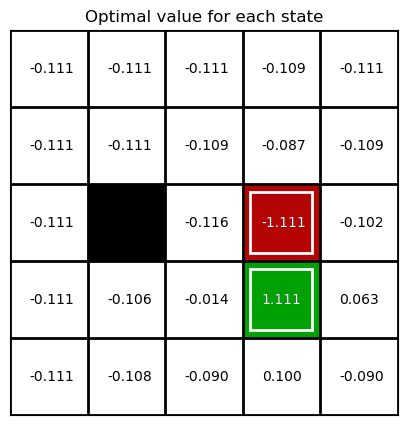

In [3]:
### Instantiate a GridWorld instance
height = 5
width = 5
exits = {'good_exit': (3, 1), 'bad_exit': (3, 2)}
walls = [(1, 2)]
rewards = {'living_reward': -0.1, 'win_reward': 1, 'lose_reward': -1}
init_pos = None
grid_world = GridWorld(height, width, exits, walls, rewards, initialize=None)

gamma = 0.1
values = value_iteration(grid_world, max_iter=100, gamma=gamma)
display_values(grid_world, values)

## Learning the optimal policy

Now we know how to solve Bellman optimality equation to get the optimal value fucntion $V^*(s)$. However, recall that our goal is to learn a policy that attains such optimal value. To do so, recall that the optimal policy can be determined using the action value function

$$\pi^*(a|s) = \underset{a\in \mathcal{A}}{\text{argmax}}\; q^*(s, a)$$

Since $Q^*(s, a)$ can be determined with $V^*(s)$

$$Q^*(s, a) = \sum_{s'} p(s'|s, a) [r_0 +  \gamma V^*(s')]$$

Once we have computed the action value fucntion, we can then determine the optimal policy. Below we first implement a function to extract the action value function, and also a function that extracts the optimal policy from the learned q-values. 

In [4]:
def extract_q_values(grid_world, values, gamma=1.0):
    """
    Extract Q-values from the learned value function
    param grid_world: a GridWorld instance
        The grid world environment where the value iteration is performed.
    @param values: numpy.ndarray
        Learned value function
    @param gamma: float, optional (default=1.0)
        Discount factor for future rewards.
        
    @return q_values: dict
        A dictionary where keys are states (tuples of coordinates) and values are dictionaries.
        Each inner dictionary maps actions to their corresponding Q-values.
    """
    height, width = grid_world.height, grid_world.width 
    q_values = dict()
    for state in grid_world.get_states():
        available_actions, successors = grid_world.get_available_actions(state)
        q_value = dict()
        for action in available_actions:
            value = 0
            prob_dist = grid_world.get_transition_prob(state, action)
            for successor, prob in prob_dist.items():
                reward = grid_world.get_reward(state, successor)
                value += prob * (reward + gamma * values[successor[0]][successor[1]])
            q_value[action] = value
        q_values[state] = q_value
    return q_values

In [5]:
def extract_policy(q_values):
    """
    Extracts the optimal policy from the learned q-value
    @param q_values: dict
        Learned q-value function
        
    @return: policy: dict
        A dictionary where keys are states and values are actions
    """
    policy = dict()
    for state in q_values.keys():
        q_value = q_values[state]
        opt_action = max(q_value, key=q_value.get) if len(q_value) > 0 else None
        policy[state] = opt_action
    return policy

Using the learned value function, we can first determine the action value function.

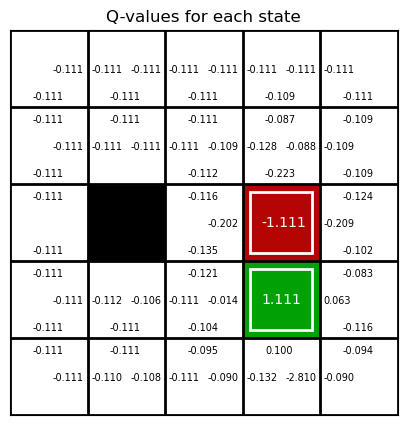

In [6]:
q_values = extract_q_values(grid_world, values, gamma=gamma)
display_qvalues(grid_world, q_values)

And the learned policy is given by

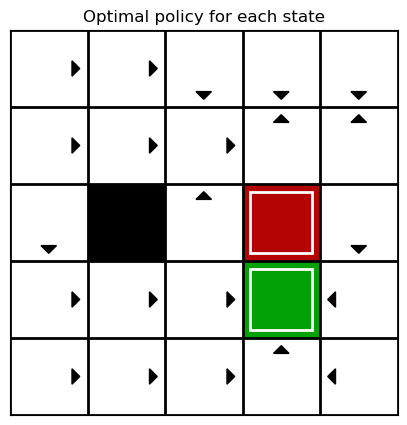

In [7]:
policy = extract_policy(q_values)
display_policy(grid_world, policy)